In [1]:
import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')
rc('font', size=14)

## Gravitational wave rates

This example runs a number of SkyPy modules to create a catalogue of galaxies with compact binary merger rates according to the linear model of [Abadie et al (2010)](ttps://arxiv.org/abs/1003.2480) (Table III).

Running the `gravitational_wave_rates` example:
```bash
$ skypy gravitational_wave_rates.yml --format fits
```
generates an output catalogue for us to load in:

In [2]:
merger_rates = Table.read('merger_rates.fits')

In [3]:
print(merger_rates.info)

<Table length=37367>
   name     dtype   unit 
---------- ------- ------
  redshift float64       
 magnitude float64       
luminosity float64       
bh_bh_rate float64 1 / yr
ns_bh_rate float64 1 / yr
ns_ns_rate float64 1 / yr



Here we make a quick visual check of the columns.

We have asked for redshifts and magnitudes over the given redshift range and magnitude limit:

```yaml
z_range: !numpy.arange [0, 2.01, 0.1]
mag_lim: 30

merger_rates:
    redshift: !skypy.galaxy.redshift.schechter_lf_redshift
      redshift: $z_range
      M_star: $M_star_red
      phi_star: $phi_star_red
      alpha: $alpha_red
      m_lim: $mag_lim
      fsky: $fsky
    magnitude: !skypy.galaxy.luminosity.schechter_lf_magnitude
      redshift: $merger_rates.redshift
      M_star: $M_star_red
      alpha: $alpha_red
      m_lim: $mag_lim
```

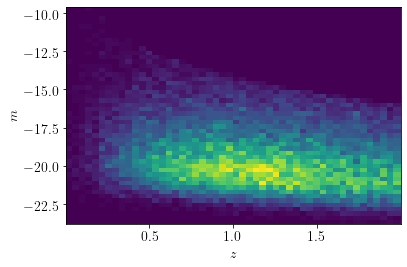

In [4]:
plt.figure()
plt.hist2d(merger_rates['redshift'], merger_rates['magnitude'], bins=50)
plt.xlabel('$z$')
plt.ylabel('$m$');

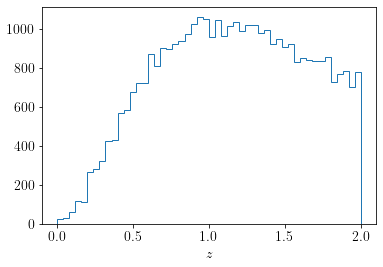

In [5]:
plt.figure()
plt.hist(merger_rates['redshift'], histtype='step', bins=50)
plt.xlabel('$z$');

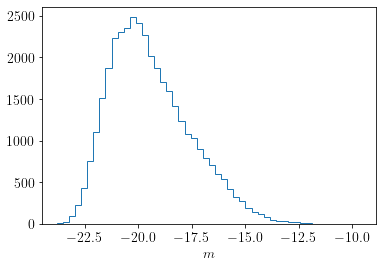

In [6]:
plt.figure()
plt.hist(merger_rates['magnitude'], histtype='step', bins=50)
plt.xlabel('$m$');

We also asked to generate blue light luminosities for these objects:
```yaml
    luminosity: !skypy.galaxy.luminosity.luminosity_from_absolute_magnitude
      absolute_magnitude: $merger_rates.magnitude
      zeropoint: Lsun_B
```

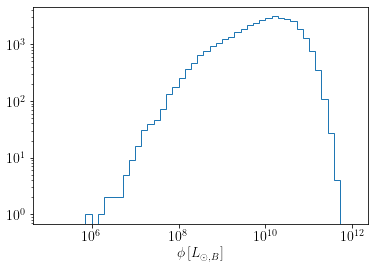

In [7]:
plt.figure()
plt.hist(merger_rates['luminosity'], histtype='step', bins=np.logspace(5,12,50))
plt.xlabel('$\phi\,$[$L_{\odot, B}$]')
plt.xscale('log')
plt.yscale('log');

And merger rates for three different types of compact binary merger:
```yaml
    ns_ns_rate: !skypy.gravitational_wave.b_band_merger_rate
      population: NS-NS
      optimism: low
      luminosity: $merger_rates.luminosity
    ns_bh_rate: !skypy.gravitational_wave.b_band_merger_rate
      population: NS-BH
      optimism: low
      luminosity: $merger_rates.luminosity
    bh_bh_rate: !skypy.gravitational_wave.b_band_merger_rate
      population: BH-BH
      optimism: low
      luminosity: $merger_rates.luminosity
```

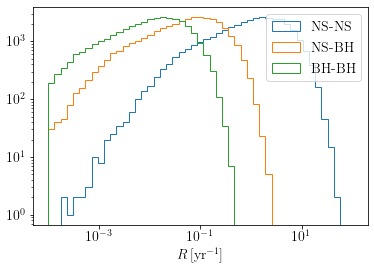

In [8]:
plt.figure()
plt.hist(merger_rates['ns_ns_rate'], histtype='step', bins=np.logspace(-4,2,50), label='NS-NS')
plt.hist(merger_rates['ns_bh_rate'], histtype='step', bins=np.logspace(-4,2,50), label='NS-BH')
plt.hist(merger_rates['bh_bh_rate'], histtype='step', bins=np.logspace(-4,2,50), label='BH-BH')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$R\,$[yr$^{-1}$]');